In [1]:
from datasets.behavior import *
from common.utils import *
from common.plot_utils import *
from common.train_utils import *

In [2]:
full_dataset = BehaviourDataset('./behavior.csv')

### Train/Val

In [3]:
val_size = 0.2
val_inds = subset_ind(full_dataset, 0.2)

In [4]:
train_dataset = Subset(full_dataset, [i for i in range(len(full_dataset)) if i not in val_inds])
val_dataset = Subset(full_dataset, val_inds)

print(f'train size: {len(train_dataset)}\nval size: {len(val_dataset)}')

train size: 40000
val size: 10000


### Dataloaders

In [28]:
BATCH_SIZE = 1

In [29]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

### NN Model

In [30]:
loss_function = torch.nn.BCELoss()

In [31]:
class Reshape(torch.nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

In [62]:
model = torch.nn.Sequential(
    torch.nn.Linear(105, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1),
    torch.nn.Sigmoid()
)

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

### Train

In [63]:
EPOCHS = 20

In [64]:
train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_function, optimizer, EPOCHS)

Epoch 1/20. time: 35.668s
train loss: 0.487160
val loss: 0.468272
validation acc: 0.768600


Epoch 2/20. time: 32.264s
train loss: 0.455139
val loss: 0.452524
validation acc: 0.788600


Epoch 3/20. time: 31.819s
train loss: 0.439394
val loss: 0.436592
validation acc: 0.793700


Epoch 4/20. time: 35.217s
train loss: 0.426176
val loss: 0.462439
validation acc: 0.730800


Epoch 5/20. time: 32.297s
train loss: 0.420024
val loss: 0.429824
validation acc: 0.793500


Epoch 6/20. time: 31.983s
train loss: 0.413651
val loss: 0.431355
validation acc: 0.797500


Epoch 7/20. time: 31.946s
train loss: 0.408346
val loss: 0.436204
validation acc: 0.787500


Epoch 8/20. time: 32.526s
train loss: 0.404482
val loss: 0.429077
validation acc: 0.801100


Epoch 9/20. time: 35.149s
train loss: 0.400835
val loss: 0.422143
validation acc: 0.803300


Epoch 10/20. time: 36.346s
train loss: 0.399234
val loss: 0.432304
validation acc: 0.807200


Epoch 11/20. time: 35.846s
train loss: 0.397207
val loss: 0.431147
va

In [65]:
torch.save(model, 'behavior_clf_20_epoch.pth')

### Results

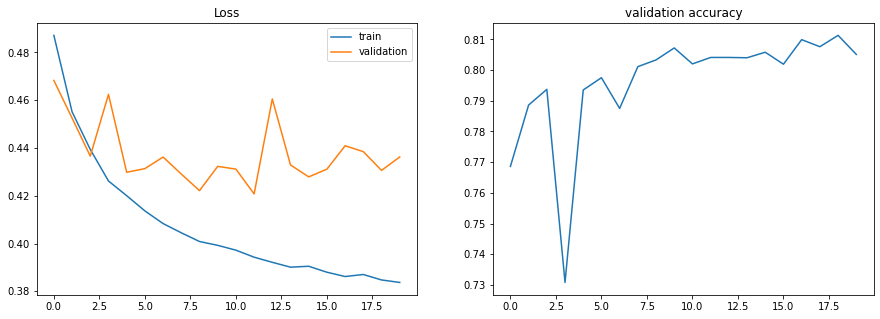

In [66]:
plot_train(train_loss, val_loss, val_accuracy)